# ÉVALUATION DE L’ÉQUITÉ DES MODÈLES D’APPRENTISSAGE PROFOND PRÉENTRAÎNÉS
# I. Statistiques sur RAF-DB : Analyse exploratoire des données
# Projet de 15 crédits de Wajih Mghazli

In [12]:
from fairness_sdk.data_preparation import RAFDB_subgroups_init, RAFDB_loader_api
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1. Chargement des données de RAF-DB

In [3]:
FEATURES_PATH = 'dataset/RAF/basic/Image/aligned/'
ANNOTATIONS_PATH = 'dataset/RAF/basic/Annotation/manual/Landmarks_5/'
LABELS_PATH = 'dataset/RAF/basic/EmoLabel/list_patition_label.txt'
img_rows, img_cols, img_channels, num_classes = 224, 224, 3, 7

In [4]:
raf_db = RAFDB_loader_api(FEATURES_PATH, ANNOTATIONS_PATH, LABELS_PATH, True)

In [6]:
train_images_gender, train_labels_gender, train_images_race, train_labels_race = RAFDB_subgroups_init()

In [23]:
train_images_gender['male'] = np.array(raf_db['images_gender']['male'])
train_labels_gender['male'] = np.array(raf_db['labels_gender']['male'])
train_images_gender['female'] = np.array(raf_db['images_gender']['female'])
train_labels_gender['female'] = np.array(raf_db['labels_gender']['female'])

train_images_race['caucasian'] = np.array(raf_db['images_race']['caucasian'])
train_labels_race['caucasian'] = np.array(raf_db['labels_race']['caucasian'])
train_images_race['asian'] = np.array(raf_db['images_race']['asian'])
train_labels_race['asian'] = np.array(raf_db['labels_race']['asian'])
train_images_race['african'] = np.array(raf_db['images_race']['african'])
train_labels_race['african'] = np.array(raf_db['labels_race']['african'])

## 2. 1 Différence du Nombre d'Exemples de Données entre Hommes et Femmes dans le Dataset RAF-DB

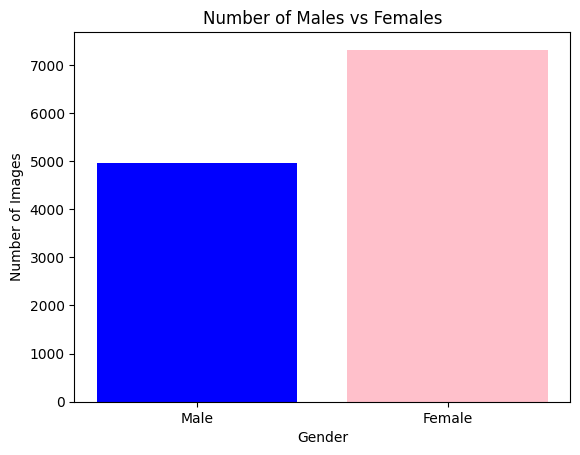

In [24]:
# Number of male compared to number of females
num_male = len(train_labels_gender['male'])
num_female = len(train_labels_gender['female'])

plt.bar(['Male', 'Female'], [num_male, num_female], color=['blue', 'pink'])
plt.title('Number of Males vs Females')
plt.xlabel('Gender')
plt.ylabel('Number of Images')
plt.show()

## 2. 2 Différence du Nombre d'Exemples de Données entre Africain, Asiatique et Caucasien dans le Dataset RAF-DB

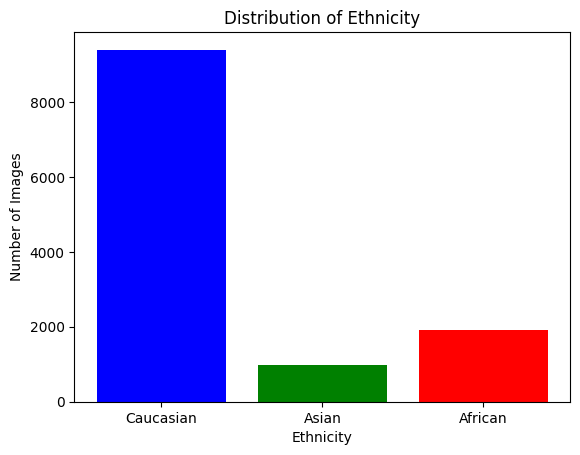

In [25]:
# Distribution of ethnicity
eth_labels = ['Caucasian', 'Asian', 'African']
eth_counts = [len(train_labels_race['caucasian']),
              len(train_labels_race['asian']),
              len(train_labels_race['african'])]
colors = ['blue', 'green', 'red'] 

plt.bar(eth_labels, eth_counts, color=colors)
plt.title('Distribution of Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Images')
plt.show()

## 2. 3 Distribution des Étiquettes d'Émotions dans le Dataset RAF-DB

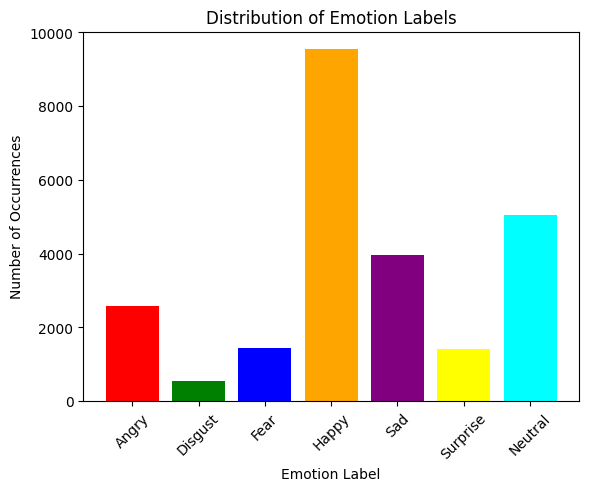

In [26]:
all_labels = np.concatenate([train_labels_gender['male'], train_labels_gender['female'], 
                              train_labels_race['caucasian'], train_labels_race['asian'], 
                              train_labels_race['african']])

# Count the number of occurrences of each label
label_counts = np.sum(all_labels, axis=0)

# Define the labels names
label_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Define the colors for each label
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan']

# Plot the results
plt.bar(label_names, label_counts, color=colors)
plt.xticks(rotation=45)
plt.title('Distribution of Emotion Labels')
plt.xlabel('Emotion Label')
plt.ylabel('Number of Occurrences')
plt.show()

## 2. 3 Distribution des Émotions par Sous-Groupe dans le Dataset RAF-DB


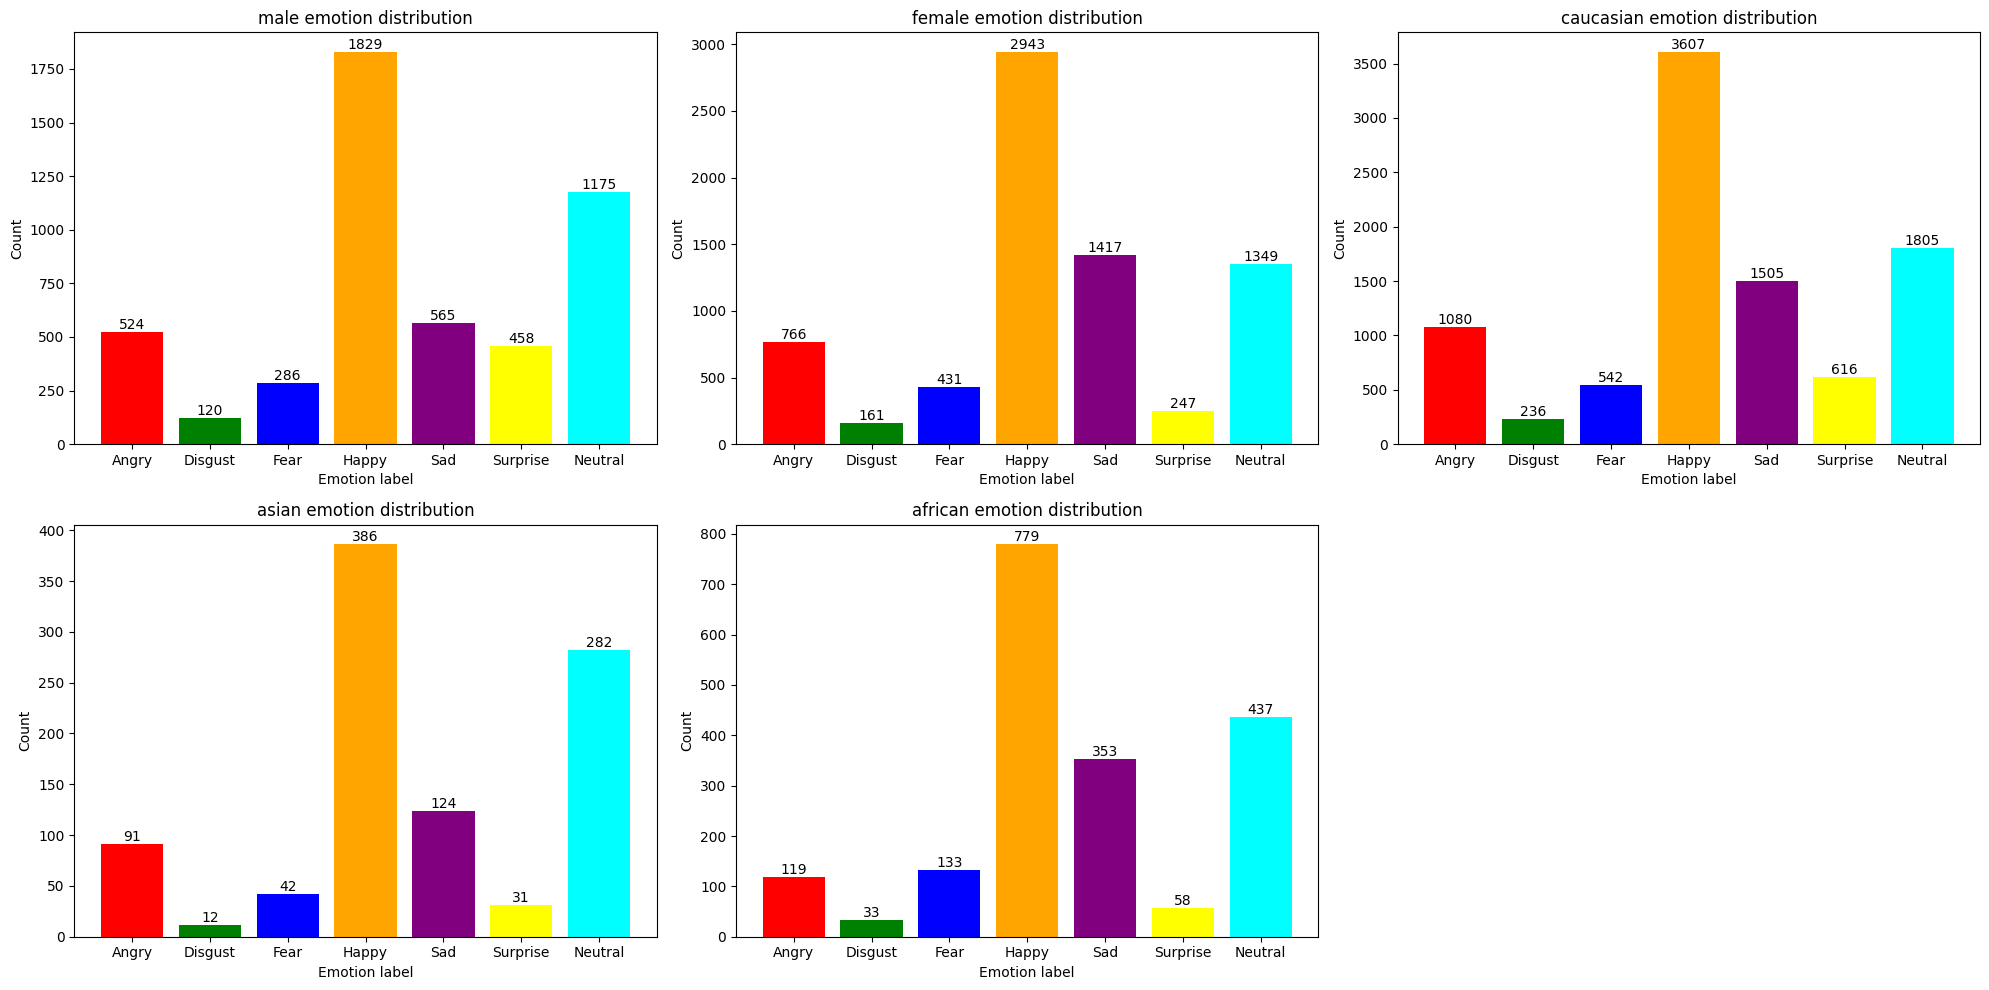

In [28]:
subgroups = {'male': train_labels_gender['male'], 'female': train_labels_gender['female'], 'caucasian': train_labels_race['caucasian'], 'asian': train_labels_race['asian'], 'african': train_labels_race['african']}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Define colors for each emotion
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan']

for i, (subgroup, ax) in enumerate(zip(subgroups, axes.flatten())):
    subgroup_labels = subgroups[subgroup]
    label_counts = np.sum(subgroup_labels, axis=0)
    x_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    
    # Assign color to each emotion
    color_map = dict(zip(x_labels, colors))
    
    # Plot multicolor bar graph
    for j, (label, count) in enumerate(zip(x_labels, label_counts)):
        ax.bar(label, count, color=color_map[label])
        ax.text(j, count, int(count), ha='center', va='bottom', color='black')
    
    ax.set_title(f'{subgroup} emotion distribution')
    ax.set_xlabel('Emotion label')
    ax.set_ylabel('Count')

# Remove the unused subplot for the 'african' subgroup
fig.delaxes(axes[1,2])

plt.tight_layout()
plt.show()